In [1]:
# 1

########## 27 December 2018 - Alec S. Hirschauer ##########
# Today I am making an [8.0] vs [3.6]-[8.0] CMD for NGC 6822 using
# Python drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# This will be the definitive iPython notebook for identifying
# AGB star candidates in NGC 6822 using a [3.6] vs J-[3.6] CMD with
# data from the Sibbons et al. (2012) WFCAM/UKIRT and
# Khan et al. (2015) Spitzer catalogs.
#
# The various populations include:
# (1) O-rich/M-type AGB star candidates
# (2) C-rich/C-type AGB star candidates
# (3) the first dusty track of O-rich AGB stars
# (4) extremely dusty sources (included with C-types)
#
# I will employ histograms fit with KDE Gaussians to find the
# local minima inflection point over the relevant range of data.
#
# This technique will then also be used to determine the color cuts
# between the various populations as measured by histograms of
# optimum bin width as determined by Knuth's Algorithm.

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# 3

# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# 4

# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')
#
# NB: the bin width routine Libby sent me had previously produced values that were
# clearly too big, which is probably due to "NULL" or "-9999" values in the inputs.
#________________
#
# update (27 Nov 2018): uploaded a jMINUSk .csv file
# that has been trimmed of all sources with magnitude
# errors greater than 0.1, as a test for optimum
# histogram bin width calculations later.
jMINUSkDATA_test = pd.read_csv('jMINUSk_test.csv')

In [5]:
# 5

# The first thing I'll do here is make the [8.0] vs [3.6]-[8.0] CMD & Hess diagram.

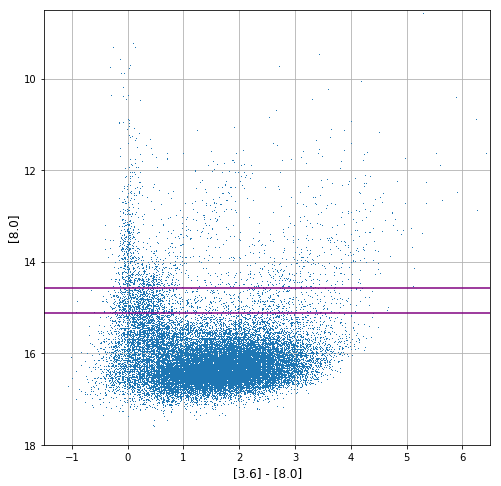

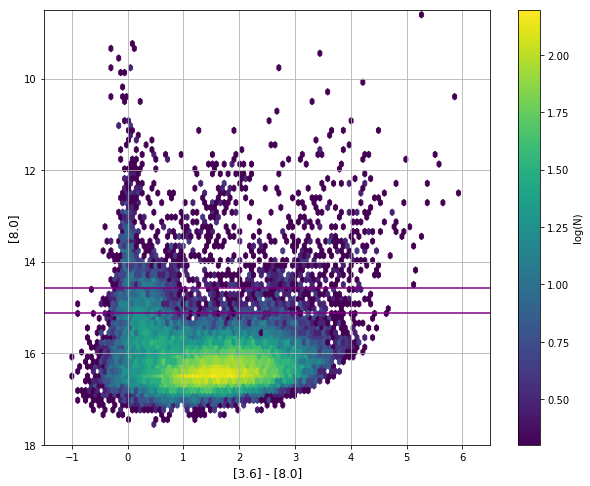

In [6]:
# 6

# [8.0] vs [3.6]-[8.0]
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
plt.axhline(y=14.566, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=15.112, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
im1 = ax1.hexbin(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
plt.axhline(y=14.566, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=15.112, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_hist.pdf')

In [7]:
# 7

# The second thing I'll do is determine where the TRGB should be.
#
# With the Sibbons+ data I had a reference point, but with the Khan+ data
# I'm starting from scratch.
#
# To do so, I'll isolate only the photometric data of sources with
# errors in the magnitudes less than 0.1.

low_error_threesixMINUSeightzeroDATA = threesixMINUSeightzeroDATA[(threesixMINUSeightzeroDATA.e36mag < 0.1) & (threesixMINUSeightzeroDATA.e80mag < 0.1)]

# And as a check, see what the number of sources is for the entire catalog
# versus the number of sources in this trimmed catalog.

print len(threesixMINUSeightzeroDATA)
print len(low_error_threesixMINUSeightzeroDATA)

30703
9174


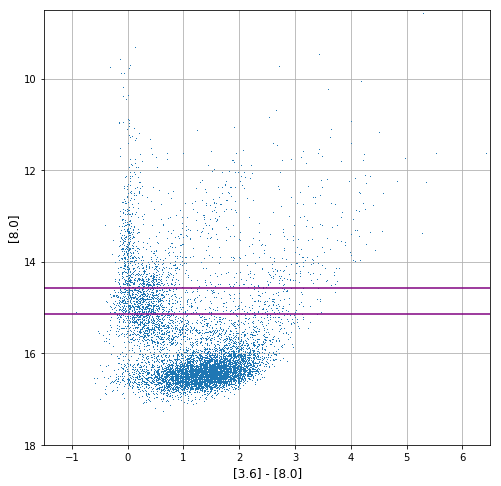

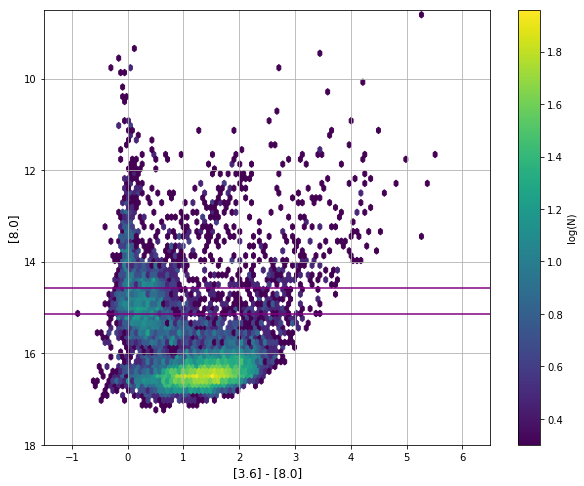

In [8]:
# 8

# With my catalog of only low-error photometry sources, I'll make a
# new CMD and Hess diagram just to see how the data look now.

# [8.0] vs [3.6]-[8.0] (low error)
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(low_error_threesixMINUSeightzeroDATA.threesixMINUSeightzero, low_error_threesixMINUSeightzeroDATA.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_plot.pdf')
plt.axhline(y=14.578, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=15.148, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
im1 = ax1.hexbin(low_error_threesixMINUSeightzeroDATA.threesixMINUSeightzero, low_error_threesixMINUSeightzeroDATA.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_hist.pdf')
plt.axhline(y=14.578, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=15.148, linewidth=1.5, color='purple') # TRGB threshold
plt.grid(True)
plt.show()
plt.close()

In [9]:
# 9

# Definitely looks cleaner than before.
#
# I'll use this trimmed catalog to develop the color cuts themselves,
# but the full catalog when I'm doing the actual source identification.

2173
0.20684210526315816
78.30534351145029


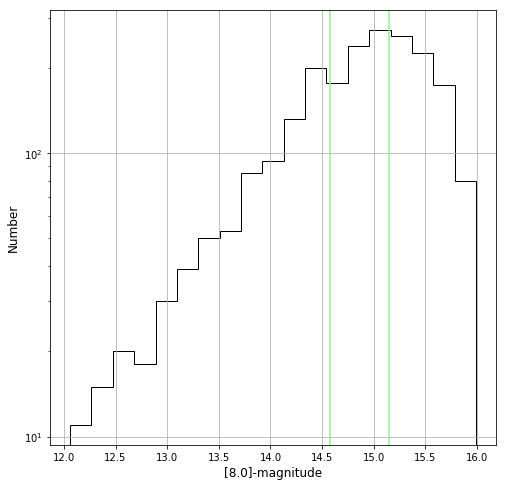

In [10]:
# 10

# In order to determine where the TRGB should be, I'll isolate the
# data between [3.6]-[8.0] = -0.25 and 0.75, where the majority of the relevant
# sources are, and make a vertical histogram of these points.
#
# ^ I'm also restricting the [8.0] range.
#
# Wherever there appears to be an inflection point in the KDE
# is where I'll say the boundary line should be.
#
# Here I'm making a list of sources in this restricted [3.6]-[8.0] range,
# plus a calculation of how many sources are included.

TRGB_hist = low_error_threesixMINUSeightzeroDATA[(low_error_threesixMINUSeightzeroDATA.threesixMINUSeightzero < 1.0)
                                 & (low_error_threesixMINUSeightzeroDATA.threesixMINUSeightzero > -0.5)
                                                & (low_error_threesixMINUSeightzeroDATA.k80mag < 16.0)
                                                & (low_error_threesixMINUSeightzeroDATA.k80mag > 12.0)]

print len(TRGB_hist)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(TRGB_hist.k80mag))
bin_number = (max(TRGB_hist.k80mag)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(TRGB_hist.k80mag, bins=np.arange(min(TRGB_hist.k80mag), max(TRGB_hist.k80mag) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('[8.0]-magnitude', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=14.578, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.axvline(x=15.148, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_TRGB_histogram.pdf')

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


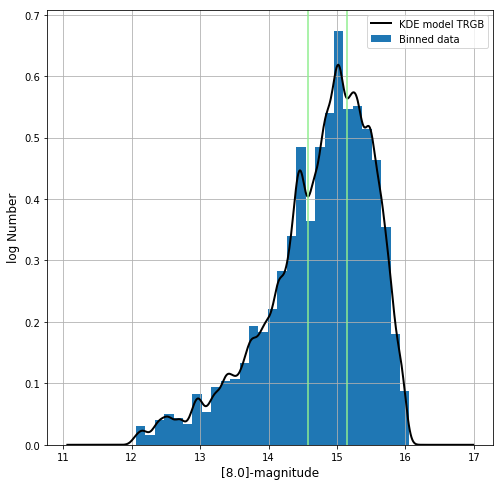

In [11]:
# 11

# The KDE analysis below will reveal the TRGB boundary.

kde_data_TRGB = TRGB_hist.k80mag.values
bins=np.arange(min(kde_data_TRGB ), max(kde_data_TRGB ) + binwidth/1.5, binwidth/1.5)
x_eval_TRGB = np.linspace(kde_data_TRGB.min() - 1.0, kde_data_TRGB.max() + 1.0, 500)
kde_TRGB = gaussian_kde(kde_data_TRGB,bw_method=binwidth/2.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_TRGB, kde_TRGB(x_eval_TRGB),'k',lw=2,label='KDE model TRGB')
plt.hist(kde_data_TRGB,bins=bins,normed=True,label='Binned data')
#plt.xlim(14.572, 14.582)
#plt.ylim(0.403, 0.405)
#plt.xlim(15.14, 15.16)
#plt.ylim(0.563, 0.565)
plt.legend()
plt.xlabel('[8.0]-magnitude', size=12)
plt.ylabel('log Number', size=12)
plt.axvline(x=14.578, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.axvline(x=15.148, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_KDE.pdf')

4158
0.11558823529411733
139.3358778625958


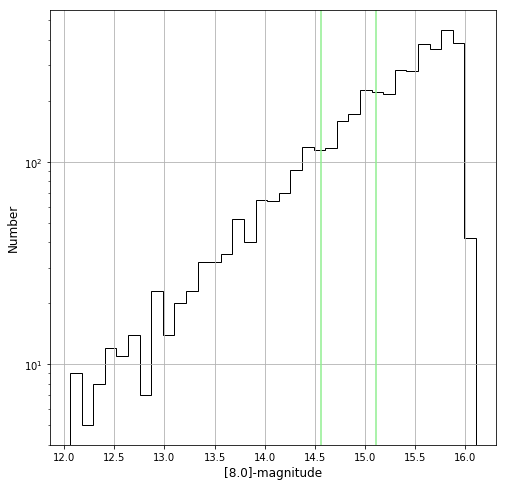

In [12]:
# 12

# Let's try this again with the non-low-error points, just because removing
# the low-error points took out a lot of the data, and I'm not reproducing
# the minimum where I expect there to be one...

# In order to determine where the TRGB should be, I'll isolate the
# data between [3.6]-[8.0] = -0.25 and 0.75, where the majority of the relevant
# sources are, and make a vertical histogram of these points.
#
# ^ I'm also restricting the [8.0] range.
#
# Wherever there appears to be an inflection point in the KDE
# is where I'll say the boundary line should be.
#
# Here I'm making a list of sources in this restricted [3.6]-[8.0] range,
# plus a calculation of how many sources are included.

TRGB_hist2 = threesixMINUSeightzeroDATA[(threesixMINUSeightzeroDATA.threesixMINUSeightzero < 1.0)
                                 & (threesixMINUSeightzeroDATA.threesixMINUSeightzero > -0.5)
                                                & (threesixMINUSeightzeroDATA.k80mag < 16.0)
                                                & (threesixMINUSeightzeroDATA.k80mag > 12.0)]

print len(TRGB_hist2)

# Next I'll compute the optimum bin width using Knuth's Algorithm
# over which the histogram will plot the data, then print out this
# value and the number of bins that will be implemented.

binwidth = (stats.knuth_bin_width(TRGB_hist2.k80mag))
bin_number = (max(TRGB_hist2.k80mag)+binwidth)/binwidth

print binwidth
print bin_number

# Finally, here's the histogram of the relevant data:

fig = plt.figure(figsize = (8,8))
plt.hist(TRGB_hist2.k80mag, bins=np.arange(min(TRGB_hist2.k80mag), max(TRGB_hist2.k80mag) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
#plt.xlim(16.0, 18.0)
#plt.ylim(100.0, 1000.0)
plt.xlabel('[8.0]-magnitude', size=12)
plt.ylabel('Number', size=12)
plt.axvline(x=14.566, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.axvline(x=15.112, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_TRGB_histogram.pdf')

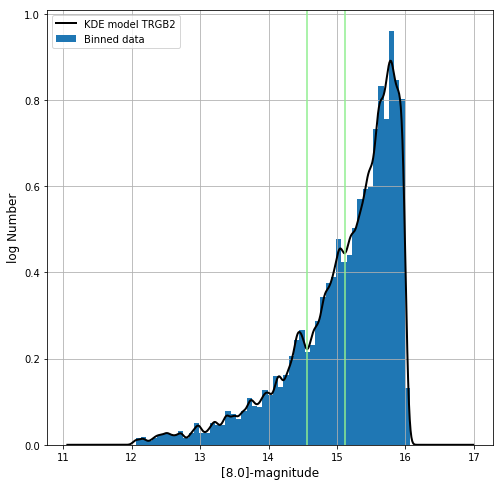

In [13]:
# 13

# The KDE analysis below will reveal the TRGB boundary (non-low-error).

kde_data_TRGB2 = TRGB_hist2.k80mag.values
bins=np.arange(min(kde_data_TRGB2 ), max(kde_data_TRGB2 ) + binwidth/1.5, binwidth/1.5)
x_eval_TRGB2 = np.linspace(kde_data_TRGB2.min() - 1.0, kde_data_TRGB2.max() + 1.0, 500)
kde_TRGB2 = gaussian_kde(kde_data_TRGB2,bw_method=binwidth/2.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval_TRGB2, kde_TRGB2(x_eval_TRGB2),'k',lw=2,label='KDE model TRGB2')
plt.hist(kde_data_TRGB2,bins=bins,normed=True,label='Binned data')
#plt.xlim(14.5575, 14.5725)
#plt.ylim(0.222, 0.223)
#plt.xlim(15.10, 15.12)
#plt.ylim(0.444, 0.446)
plt.legend()
plt.xlabel('[8.0]-magnitude', size=12)
plt.ylabel('log Number', size=12)
plt.axvline(x=14.566, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.axvline(x=15.112, linewidth=1.5, color='lightgreen') # TRGB value determined from KDE below
plt.grid(True)
plt.show()
plt.close()
#plt.savefig('[8.0]_vs_[3.6]-[8.0]_KDE.pdf')

In [14]:
# 14

# The low-error versus non-low-error analyses yielded potential TRGB boundaries at
# [8.0] = 14.578 and 14.566 (average = 14.572)
# and
# [8.0] = 15.148 and 15.112 (average = 15.130)
# which I have added on to the appropriate plots.
#
# 
# The values for a given line does not vary much between low-error and non-low-error,
# so I'll assume that that change has no real effect on the analysis.
#
# The bigger question is which one of the two minima is more likely to be the TRGB?
#
# Based on Laurin's analysis from the summer, there was a foreground-contamination limit
# set at [8.0] = 15.4, below which all the points were rejected.
#
# That's not the same thing as a TRGB, so I shoudn't let it influence my work here.
#
# The *higher* line ([8.0] = ~14.6) is a bit more obvious of a minimum in the KDE,
# however is would necessarily exclude more sources.
#
# The *lower* line ([8.0] = ~15.1) is less obvious as a minimum in the KDE, but would
# include more sources (which could be removed later), and as a bonus is closer to
# Laurin's original foreground segregation threshold of [8.0] = 15.4 from before.
#
# So even though it will be more work, I think the best course of action is to select the
# boundary line which includes more sources..
#
# And I'll choose the value from the low-error analysis, which is [8.0] = 15.148, since
# I believe it more than the non-low-error analysis (even though they're very close).

In [15]:
# 15

# The third thing I'll do is start constructing the vertical bins
# over which the color-cut values will be estimated.
#
# I'll need to determine the optimum bin width, so I'll make another
# list of sources, with photometric errors less than 0.1
# and above the TRGB limit of [8.0] = 15.148.

color_cuts = low_error_threesixMINUSeightzeroDATA[(low_error_threesixMINUSeightzeroDATA.k80mag < 15.148)]

print len(threesixMINUSeightzeroDATA)
print len(low_error_threesixMINUSeightzeroDATA)
print len(TRGB_hist)
print len(color_cuts)

# The number of sources are printed here as well, in the following lists:
# (1) all data
# (2) all data with photometric errors less than 0.1
# (3) all data with photometric errors less than 0.1 and between [3.6]-[8.0] = -0.5 to 1.0
# (4) all data with photometric errors less than 0.1 and above [8.0] = 15.148

30703
9174
2173
2077


In [16]:
# 16

# Based on the list of sources determined from the above cell, the catalog
# "color_cuts" will be used to determine the optimum bin width for the
# successive vertical bins for [3.6]-[8.0] histograms of decreasing K-magnitude,
# starting at the TRGB limit at [8.0] = 15.148

binwidth = (stats.knuth_bin_width(color_cuts.k80mag))
bin_number = (max(color_cuts.k80mag)+binwidth)/binwidth

print binwidth
print bin_number

0.18222222222222229
84.08536585365852


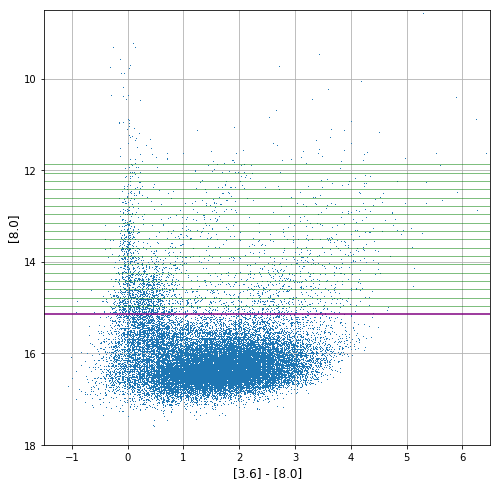

In [17]:
# 17

# I will now contruct bins of width = 0.182 dex from [8.0] = 15.148,
# building as many as I need to reach a limit of brightness which
# I am semi-arbitrarily setting at [8.0] = 12 (I'll need 18 bins).
#
# Also, I'll keep track of the number of sources in each bin
# so that if/when I need to double/triple/quadruple the bin sizes
# to recover the statistics, I can do so.
#
# Here is the [8.0] vs [3.6]-[8.0] CMD with the established boundary lines:

plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=15.148, linewidth=1.5, color='purple') # TRGB threshold
plt.axhline(y=14.966, linewidth=0.5, color='green') # Bin  1
plt.axhline(y=14.784, linewidth=0.5, color='green') # Bin  2
plt.axhline(y=14.602, linewidth=0.5, color='green') # Bin  3
plt.axhline(y=14.420, linewidth=0.5, color='green') # Bin  4
plt.axhline(y=14.238, linewidth=0.5, color='green') # Bin  5
plt.axhline(y=14.056, linewidth=0.5, color='green') # Bin  6
plt.axhline(y=13.874, linewidth=0.5, color='green') # Bin  7
plt.axhline(y=13.692, linewidth=0.5, color='green') # Bin  8
plt.axhline(y=13.510, linewidth=0.5, color='green') # Bin  9
plt.axhline(y=13.328, linewidth=0.5, color='green') # Bin 10
plt.axhline(y=13.146, linewidth=0.5, color='green') # Bin 11
plt.axhline(y=12.964, linewidth=0.5, color='green') # Bin 12
plt.axhline(y=12.782, linewidth=0.5, color='green') # Bin 13
plt.axhline(y=12.600, linewidth=0.5, color='green') # Bin 14
plt.axhline(y=12.418, linewidth=0.5, color='green') # Bin 15
plt.axhline(y=12.236, linewidth=0.5, color='green') # Bin 16
plt.axhline(y=12.054, linewidth=0.5, color='green') # Bin 17
plt.axhline(y=11.872, linewidth=0.5, color='green') # Bin 18
#
plt.grid(True)
plt.show()
plt.close()

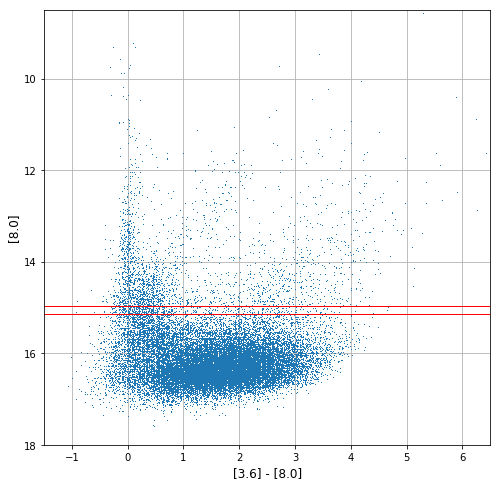

324
0.275


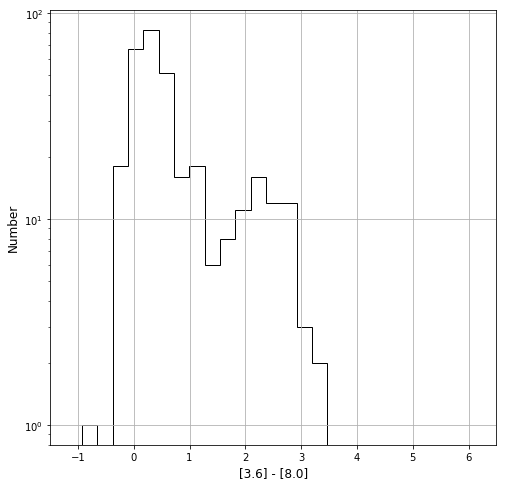

In [18]:
# 18

# Bin  1 ([8.0] = 15.148 to 14.966, center @ 15.0570)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=15.148, linewidth=1.0, color='red') # Bin 1 - lower boundary
plt.axhline(y=14.966, linewidth=1.0, color='red') # Bin 1 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 15.148) & (color_cuts.k80mag > 14.966)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

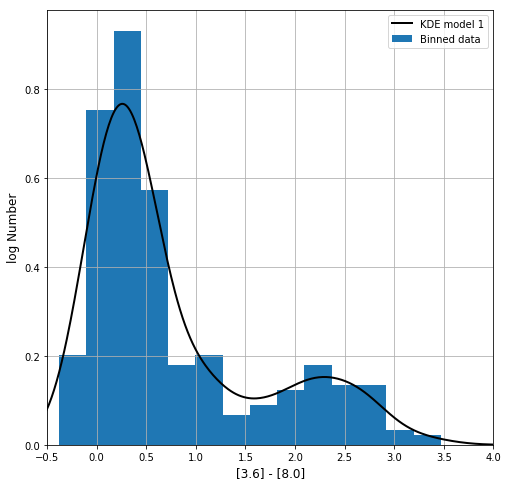

In [19]:
# 19

# Bin  1 ([8.0] = 15.148 to 14.966, center @ 15.0570)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 1')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 15.0570
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

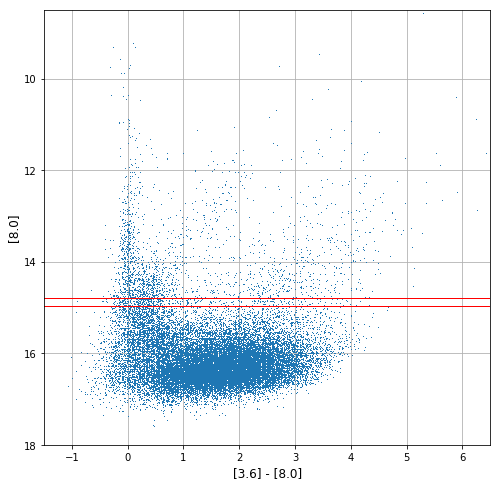

278
0.2127777777777778


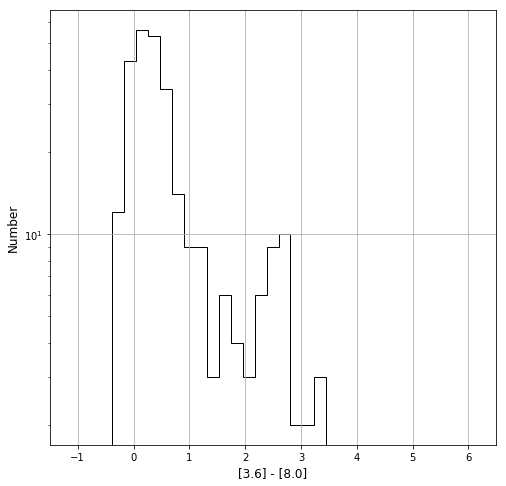

In [20]:
# 20

# Bin  2 ([8.0] = 14.966 to 14.784, center @ 14.8750)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.966, linewidth=1.0, color='red') # Bin 2 - lower boundary
plt.axhline(y=14.784, linewidth=1.0, color='red') # Bin 2 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.966) & (color_cuts.k80mag > 14.784)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

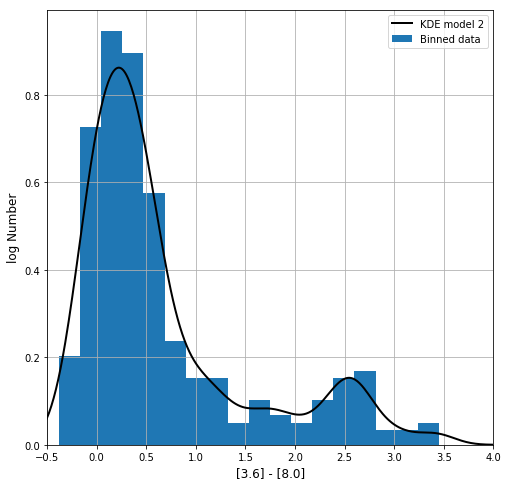

In [21]:
# 21

# Bin  2 ([8.0] = 14.966 to 14.784, center @ 14.8750)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 2')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 14.8750
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

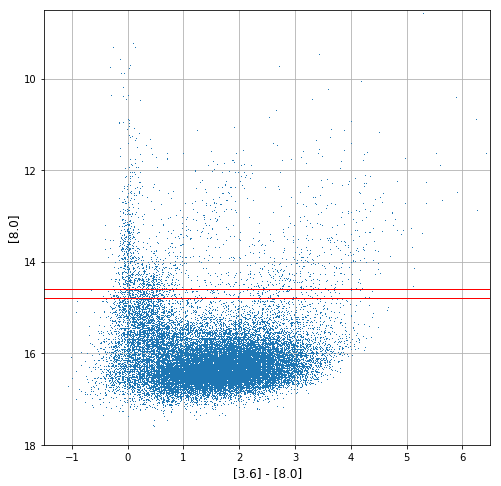

217
0.21157894736842103


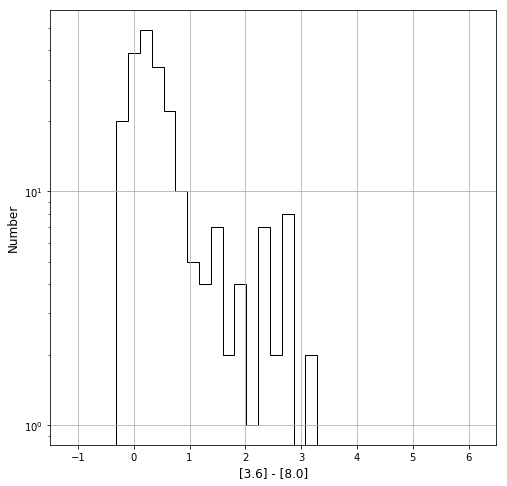

In [22]:
# 22

# Bin  3 ([8.0] = 14.784 to 14.602, center @ 14.6930)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.784, linewidth=1.0, color='red') # Bin 3 - lower boundary
plt.axhline(y=14.602, linewidth=1.0, color='red') # Bin 3 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.784) & (color_cuts.k80mag > 14.602)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

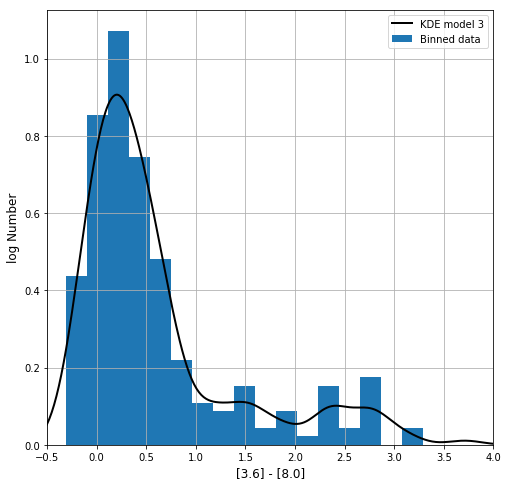

In [23]:
# 23

# Bin  3 ([8.0] = 14.784 to 14.602, center @ 14.6930)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 3')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 14.6930
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

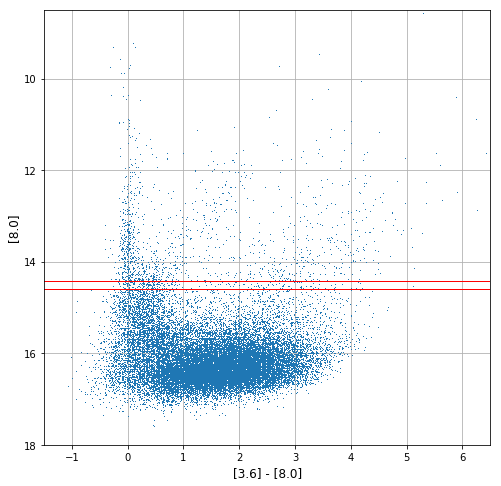

213
0.2094736842105263


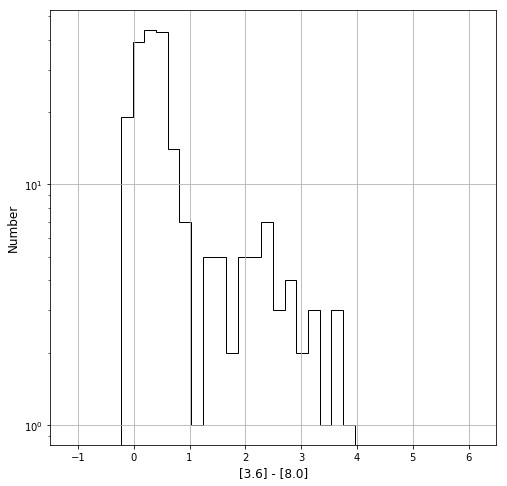

In [24]:
# 24

# Bin  4 ([8.0] = 14.602 to 14.420, center @ 14.5110)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.602, linewidth=1.0, color='red') # Bin 4 - lower boundary
plt.axhline(y=14.420, linewidth=1.0, color='red') # Bin 4 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.602) & (color_cuts.k80mag > 14.420)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

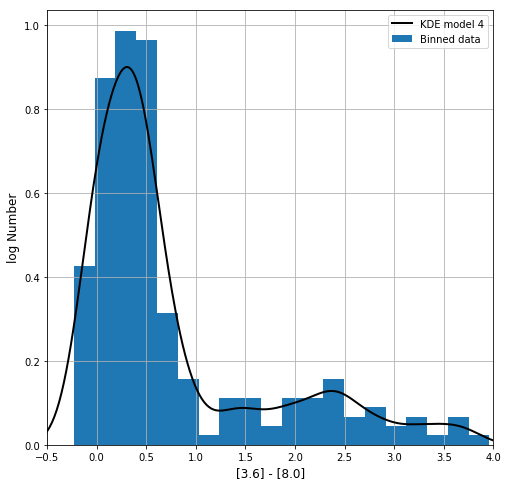

In [25]:
# 25

# Bin  4 ([8.0] = 14.602 to 14.420, center @ 14.5110)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 4')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 14.5110
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

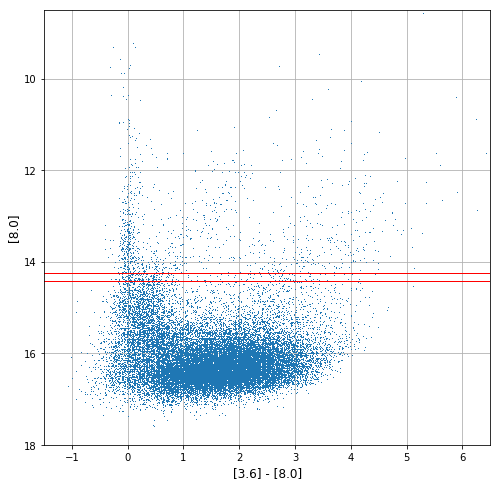

175
0.392


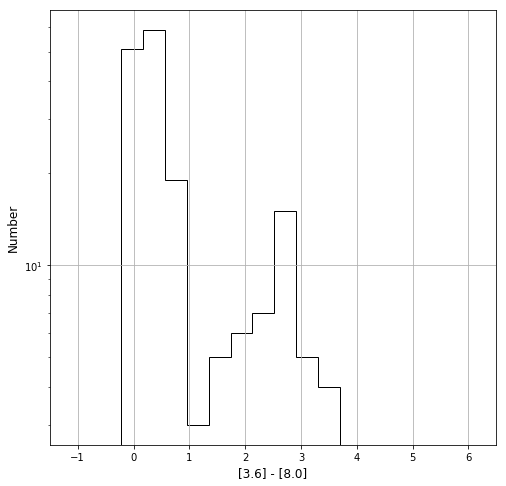

In [26]:
# 26

# Bin  5 ([8.0] = 14.420 to 14.238, center @ 14.3290)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.420, linewidth=1.0, color='red') # Bin 5 - lower boundary
plt.axhline(y=14.238, linewidth=1.0, color='red') # Bin 5 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.420) & (color_cuts.k80mag > 14.238)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

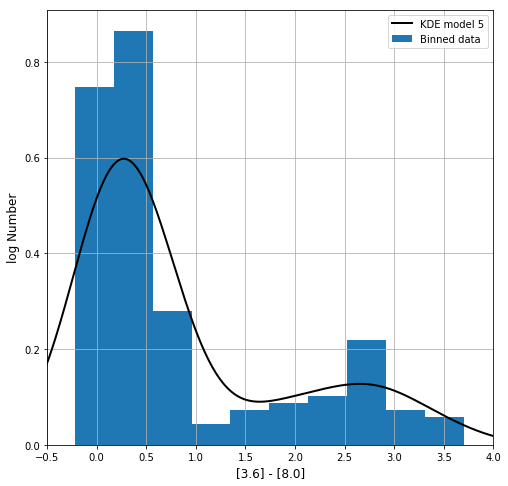

In [27]:
# 27

# Bin  5 ([8.0] = 14.420 to 14.238, center @ 14.3290)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 5')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 14.3290
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

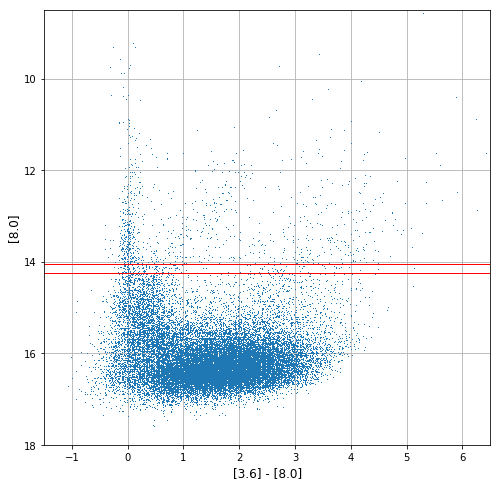

131
0.28285714285714286


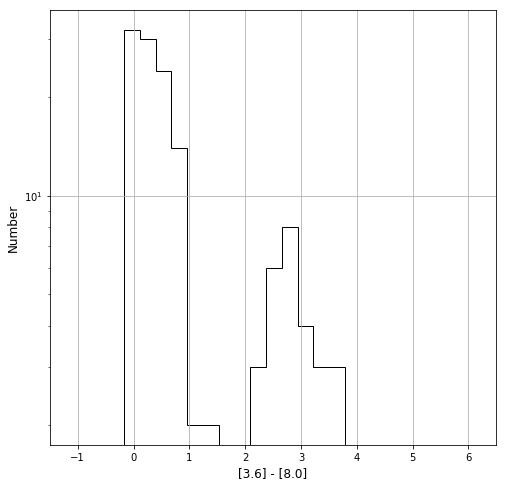

In [28]:
# 28

# Bin  6 ([8.0] = 14.238 to 14.056, center @ 14.1470)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.238, linewidth=1.0, color='red') # Bin 6 - lower boundary
plt.axhline(y=14.056, linewidth=1.0, color='red') # Bin 6 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.238) & (color_cuts.k80mag > 14.056)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

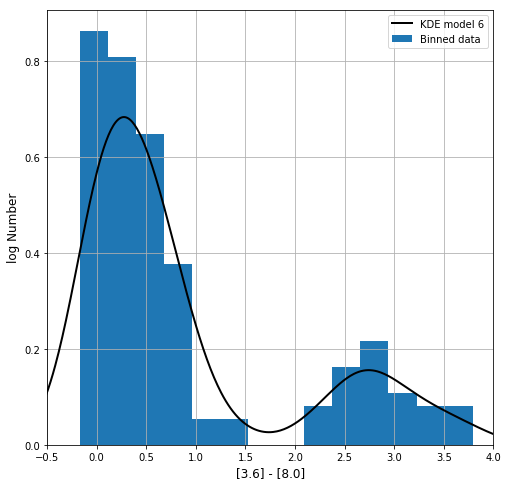

In [29]:
# 29

# Bin  6 ([8.0] = 14.238 to 14.056, center @ 14.1470)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 6')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 14.1470
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

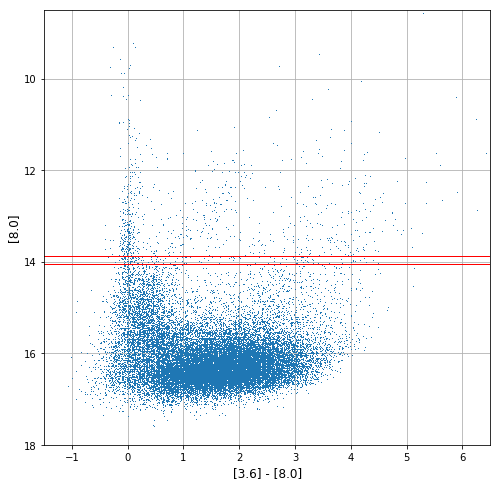

117
0.48777777777777775


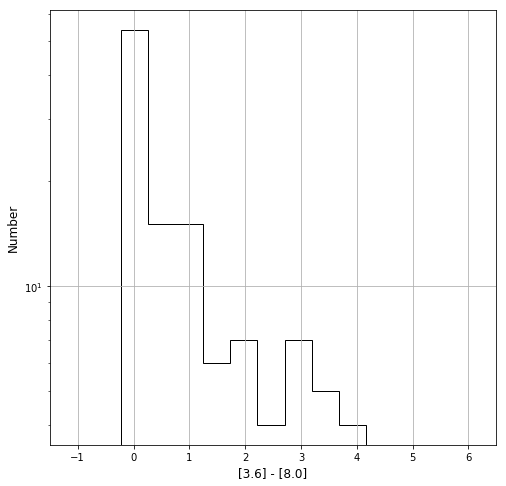

In [30]:
# 30

# Bin  7 ([8.0] = 14.056 to 13.874, center @ 13.9650)
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=14.056, linewidth=1.0, color='red') # Bin 7 - lower boundary
plt.axhline(y=13.874, linewidth=1.0, color='red') # Bin 7 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 14.056) & (color_cuts.k80mag > 13.874)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

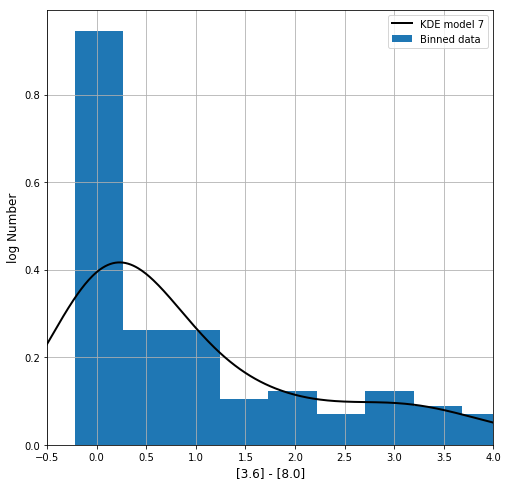

In [31]:
# 31

# Bin  7 ([8.0] = 14.056 to 13.874, center @ 13.9650)
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/1.0)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 7')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 13.9650
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

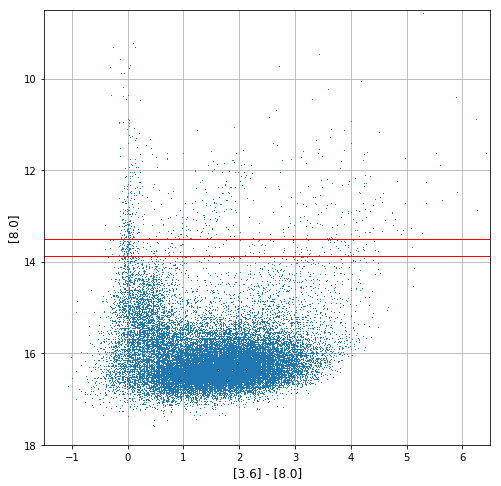

155
0.3925


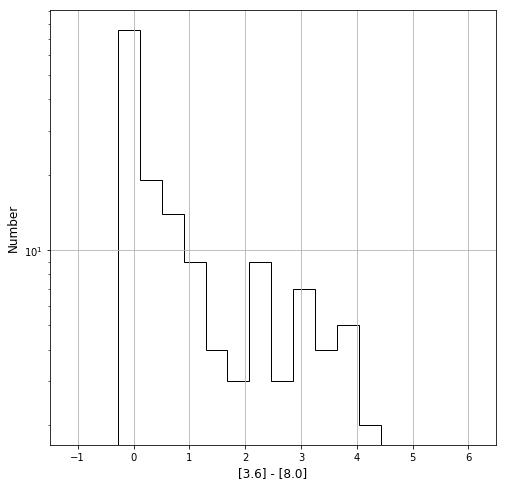

In [32]:
# 32

# Bin  8 ([8.0] = 13.874 to 13.510, center @ 13.6920) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=13.874, linewidth=1.0, color='red') # Bin 8 - lower boundary
plt.axhline(y=13.510, linewidth=1.0, color='red') # Bin 8 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 13.874) & (color_cuts.k80mag > 13.510)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

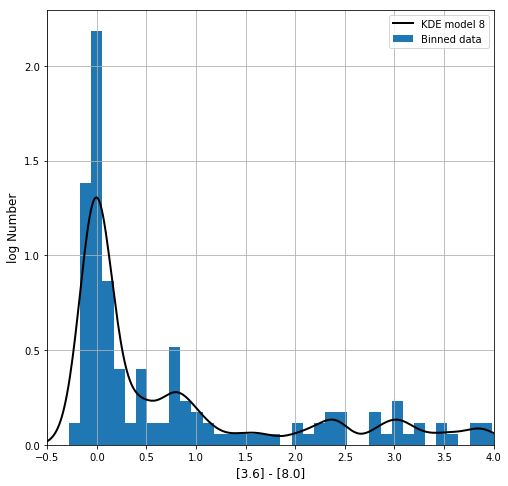

In [33]:
# 33

# Bin  8 ([8.0] = 13.874 to 13.510, center @ 13.6920) <- double-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 8')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 13.6920
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

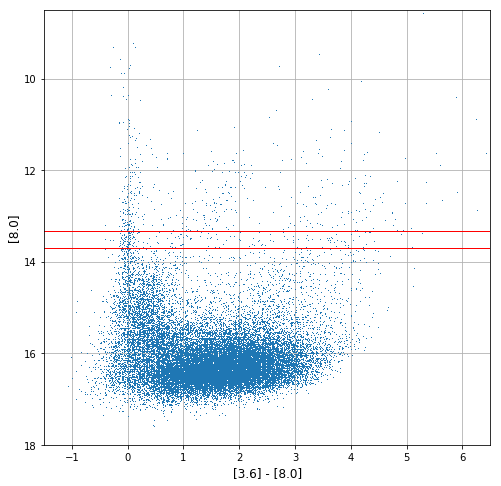

152
0.5036363636363635


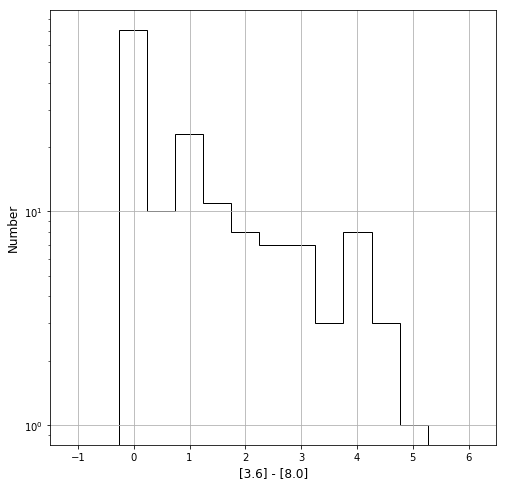

In [34]:
# 34

# Bin  9 ([8.0] = 13.692 to 13.328, center @ 13.5100) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=13.692, linewidth=1.0, color='red') # Bin 9 - lower boundary
plt.axhline(y=13.328, linewidth=1.0, color='red') # Bin 9 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 13.692) & (color_cuts.k80mag > 13.328)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

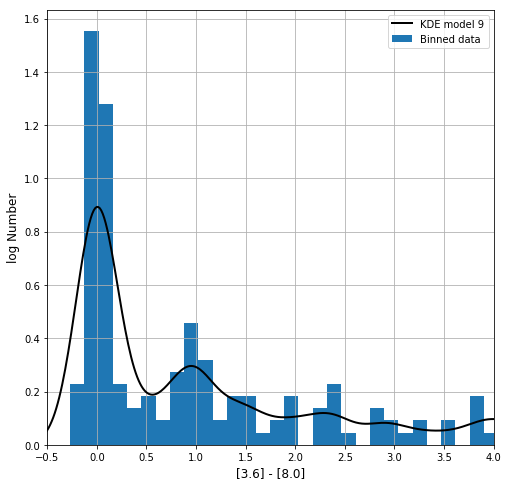

In [35]:
# 35

# Bin  9 ([8.0] = 13.692 to 13.328, center @ 13.5100) <- double-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 9')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 13.5100
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

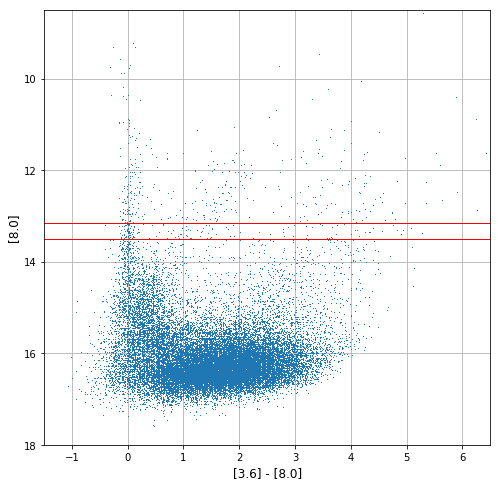

127
0.5154545454545455


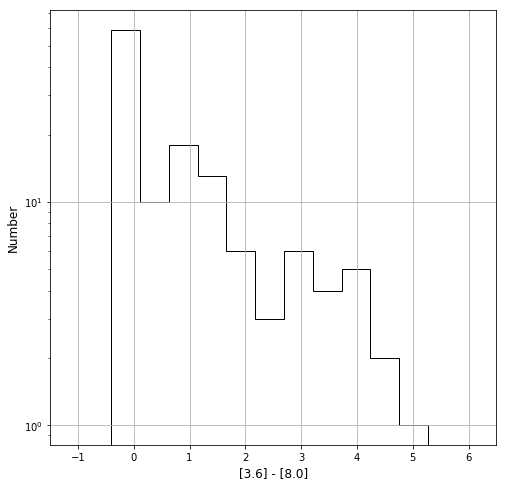

In [36]:
# 36

# Bin 10 ([8.0] = 13.510 to 13.146, center @ 13.3280) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=13.510, linewidth=1.0, color='red') # Bin 10 - lower boundary
plt.axhline(y=13.146, linewidth=1.0, color='red') # Bin 10 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 13.510) & (color_cuts.k80mag > 13.146)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

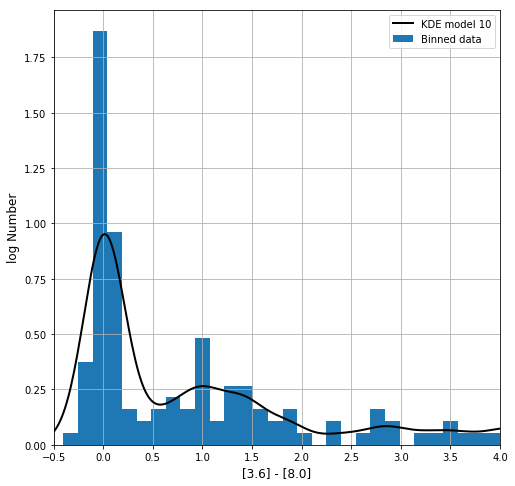

In [37]:
# 37

# Bin 10 ([8.0] = 13.510 to 13.146, center @ 13.3280) <- double-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 10')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 13.3280
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

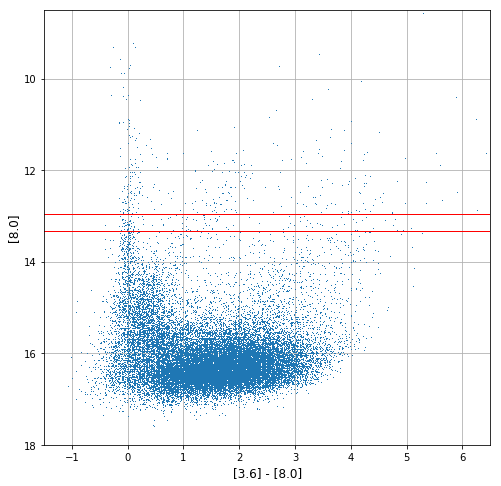

101
0.555


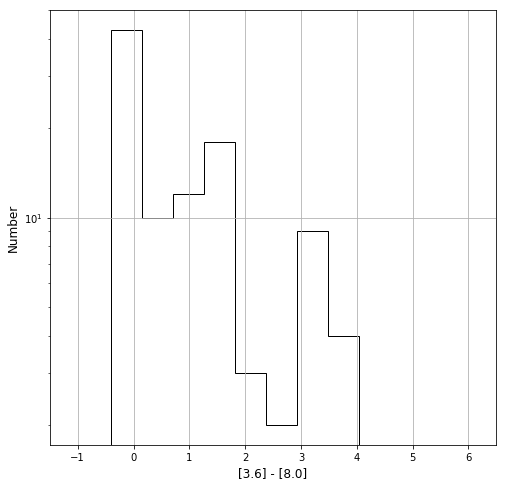

In [38]:
# 38

# Bin 11 ([8.0] = 13.328 to 12.964, center @ 13.1460) <- double-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=13.328, linewidth=1.0, color='red') # Bin 11 - lower boundary
plt.axhline(y=12.964, linewidth=1.0, color='red') # Bin 11 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 13.328) & (color_cuts.k80mag > 12.964)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

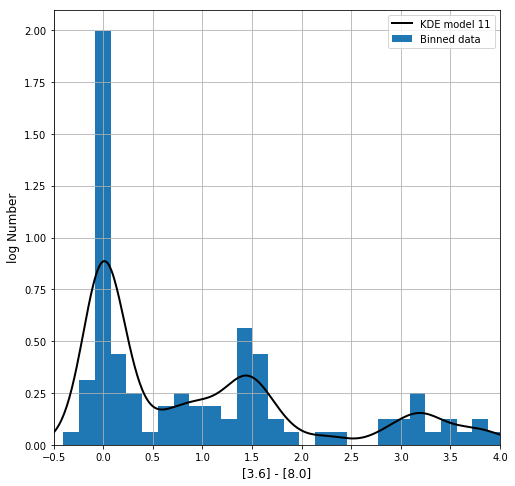

In [39]:
# 39

# Bin 11 ([8.0] = 13.328 to 12.964, center @ 13.1460) <- double-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 11')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 13.1460
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

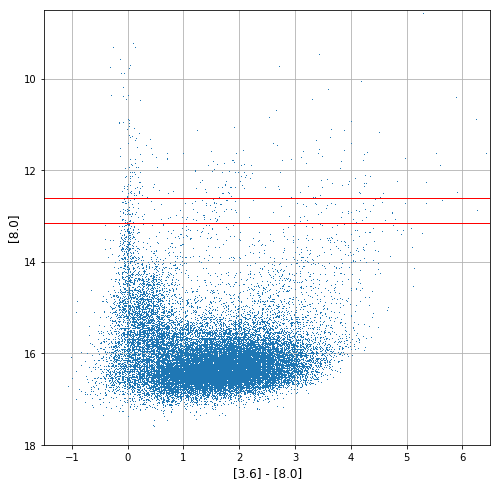

128
0.647142857142857


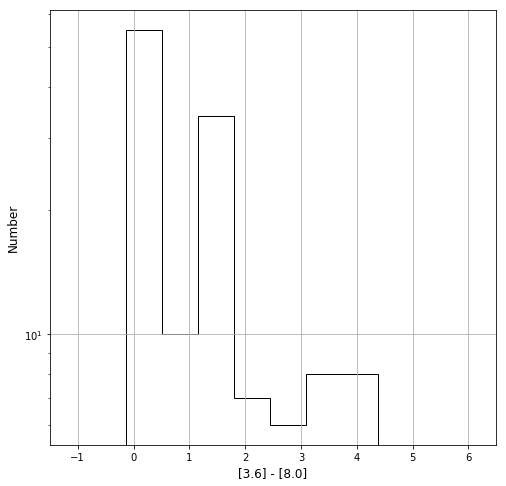

In [40]:
# 40

# Bin 12 ([8.0] = 13.146 to 12.600, center @ 12.8730) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=13.146, linewidth=1.0, color='red') # Bin 12 - lower boundary
plt.axhline(y=12.600, linewidth=1.0, color='red') # Bin 12 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 13.146) & (color_cuts.k80mag > 12.600)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

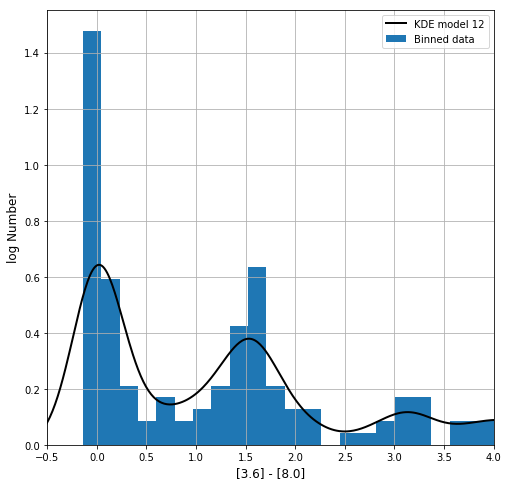

In [41]:
# 41

# Bin 12 ([8.0] = 13.146 to 12.600, center @ 12.8730) <- triple-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 12')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 12.8730
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

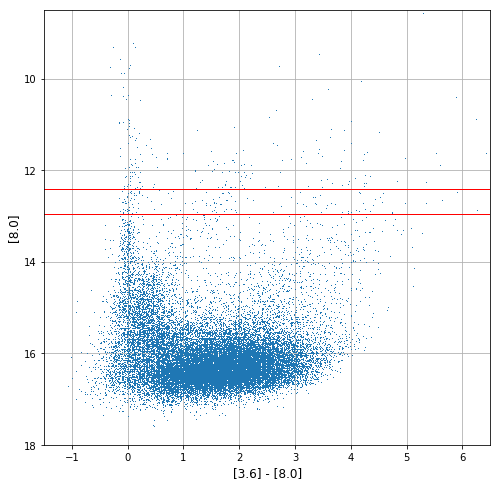

113
0.6728571428571428


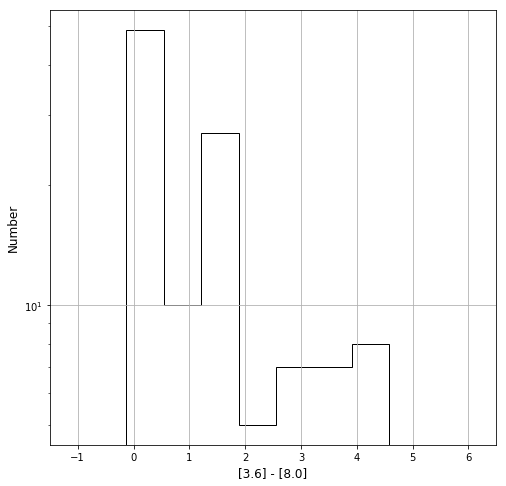

In [42]:
# 42

# Bin 13 ([8.0] = 12.964 to 12.418, center @ 12.6910) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=12.964, linewidth=1.0, color='red') # Bin 13 - lower boundary
plt.axhline(y=12.418, linewidth=1.0, color='red') # Bin 13 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 12.964) & (color_cuts.k80mag > 12.418)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

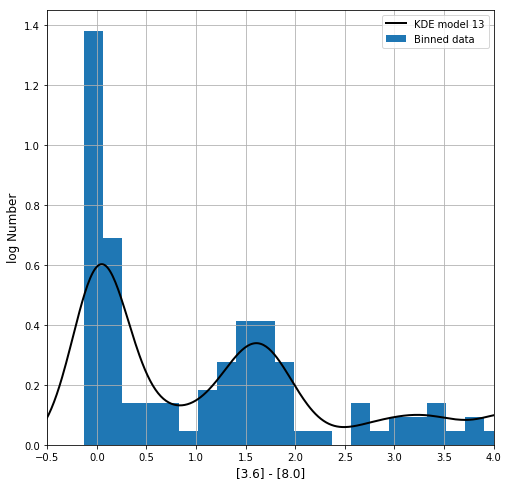

In [43]:
# 43

# Bin 13 ([8.0] = 12.964 to 12.418, center @ 12.6910) <- triple-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 13')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 12.6910
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

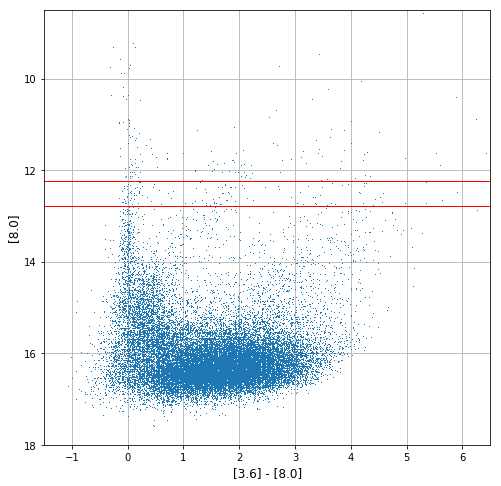

106
0.6812499999999999


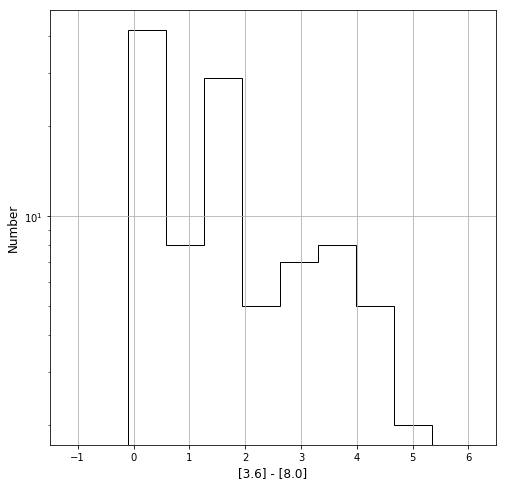

In [44]:
# 44

# Bin 14 ([8.0] = 12.782 to 12.236, center @ 12.5090) <- triple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=12.782, linewidth=1.0, color='red') # Bin 14 - lower boundary
plt.axhline(y=12.236, linewidth=1.0, color='red') # Bin 14 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 12.782) & (color_cuts.k80mag > 12.236)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

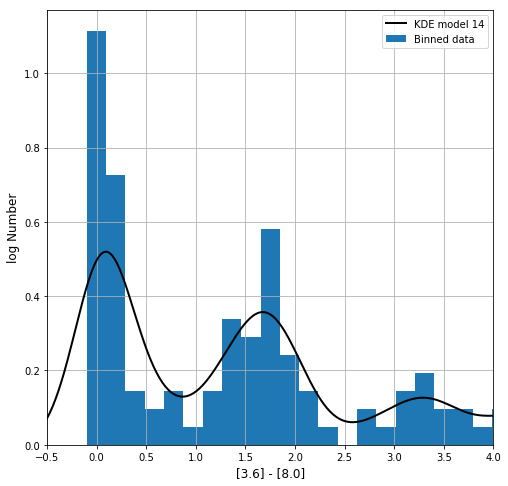

In [45]:
# 45

# Bin 14 ([8.0] = 12.782 to 12.236, center @ 12.5090) <- triple-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 14')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 12.5090
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

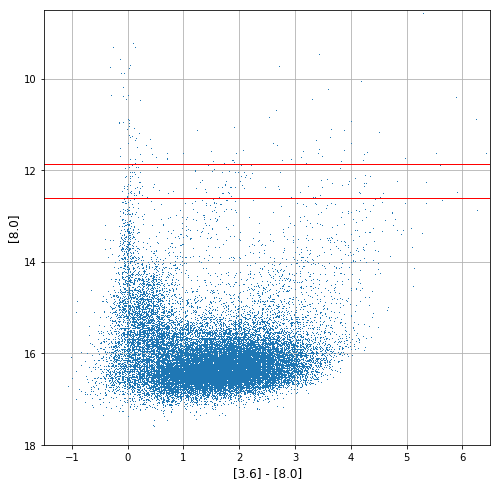

98
0.7742857142857142


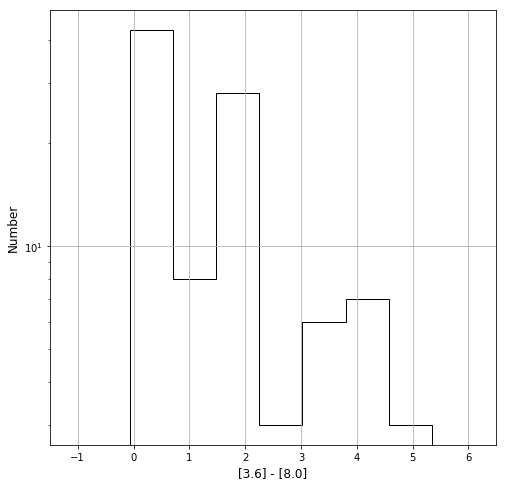

In [46]:
# 46

# Bin 15 ([8.0] = 12.600 to 11.872, center @ 12.2360) <- quadruple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=12.600, linewidth=1.0, color='red') # Bin 15 - lower boundary
plt.axhline(y=11.872, linewidth=1.0, color='red') # Bin 15 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 12.600) & (color_cuts.k80mag > 11.872)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

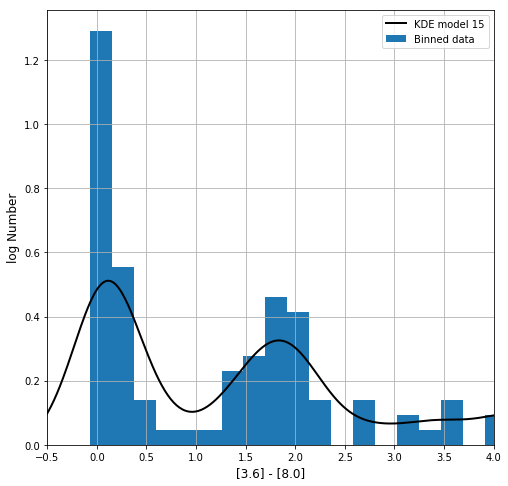

In [47]:
# 47

# Bin 15 ([8.0] = 12.600 to 11.872, center @ 12.2360) <- quadruple-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 15')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 12.2360
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

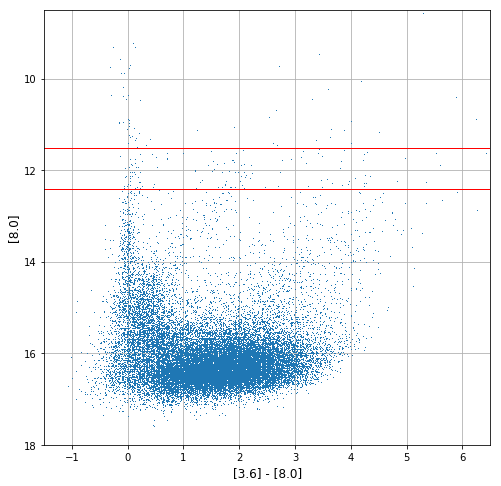

103
0.82


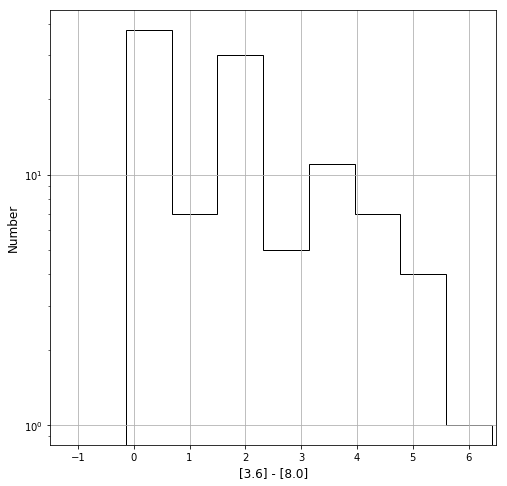

In [48]:
# 48

# Bin 16 ([8.0] = 12.418 to 11.508, center @ 11.9630) <- quintuple-wide bin
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, ',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#
plt.axhline(y=12.418, linewidth=1.0, color='red') # Bin 16 - lower boundary
plt.axhline(y=11.508, linewidth=1.0, color='red') # Bin 16 - upper boundary
#
plt.grid(True)
plt.show()
plt.close()

# define the range of [8.0] magnitudes over which the bin is sampling
# from the catalog of sources with [8.0]-mag and [3.6]-mag errors less than 0.1.
#
threesixMINUSeightzeroHIST = color_cuts[(color_cuts.k80mag < 12.418) & (color_cuts.k80mag > 11.508)]
#print threesixMINUSeightzeroHIST
print len(threesixMINUSeightzeroHIST)
#
binwidth = stats.knuth_bin_width(threesixMINUSeightzeroHIST.threesixMINUSeightzero)
bin_number = (max(threesixMINUSeightzeroHIST.threesixMINUSeightzero)+binwidth)/binwidth
print binwidth
#print bin_number
#
fig = plt.figure(figsize = (8,8))
plt.hist(threesixMINUSeightzeroHIST.threesixMINUSeightzero, bins=np.arange(min(threesixMINUSeightzeroHIST.threesixMINUSeightzero), max(threesixMINUSeightzeroHIST.threesixMINUSeightzero) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.5, 6.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

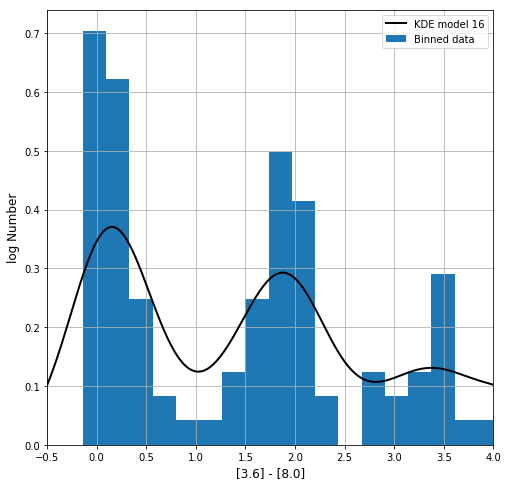

In [49]:
# 49

# Bin 16 ([8.0] = 12.418 to 11.508, center @ 11.9630) <- quintuple-wide bin
#
kde_data = threesixMINUSeightzeroHIST.threesixMINUSeightzero.values
bins=np.arange(min(kde_data ), max(kde_data ) + binwidth/3.5, binwidth/3.5)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth/3.5)
#
plt.figure(figsize=(8,8))
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='KDE model 16')
plt.hist(kde_data,bins=bins,normed=True,label='Binned data')
plt.xlim(-0.5, 4.0)

plt.legend()
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('log Number', size=12)
plt.grid(True)
plt.show()
plt.close()
#
### y-intercept: [8.0] = 11.9630
### boundary 1: [3.6] - [8.0] = 
### boundary 2: [3.6] - [8.0] = 
### boundary 3: [3.6] - [8.0] = 
### boundary 4: [3.6] - [8.0] = 

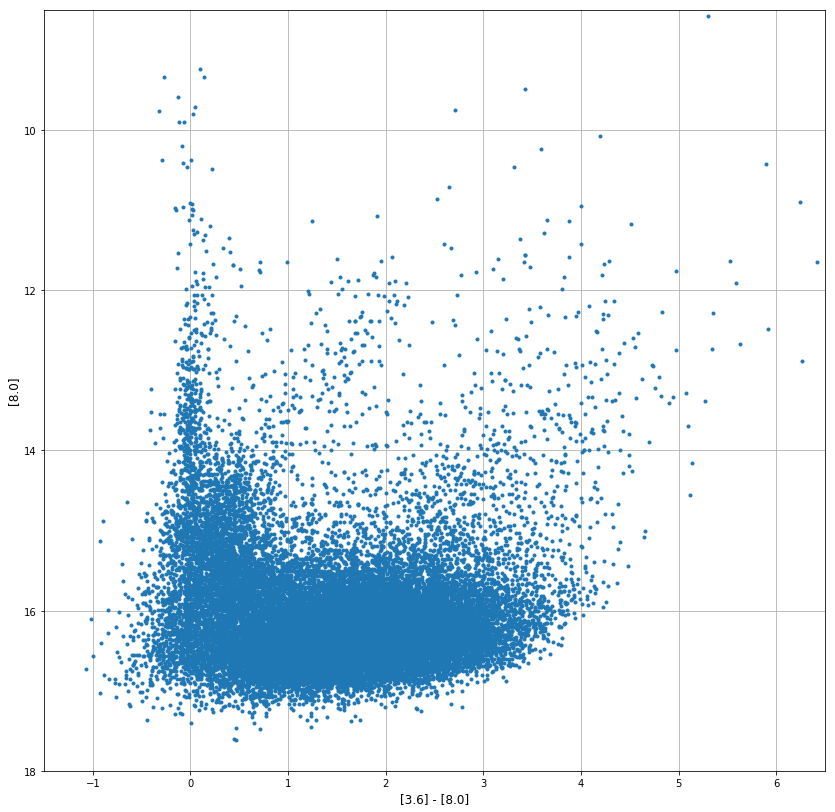

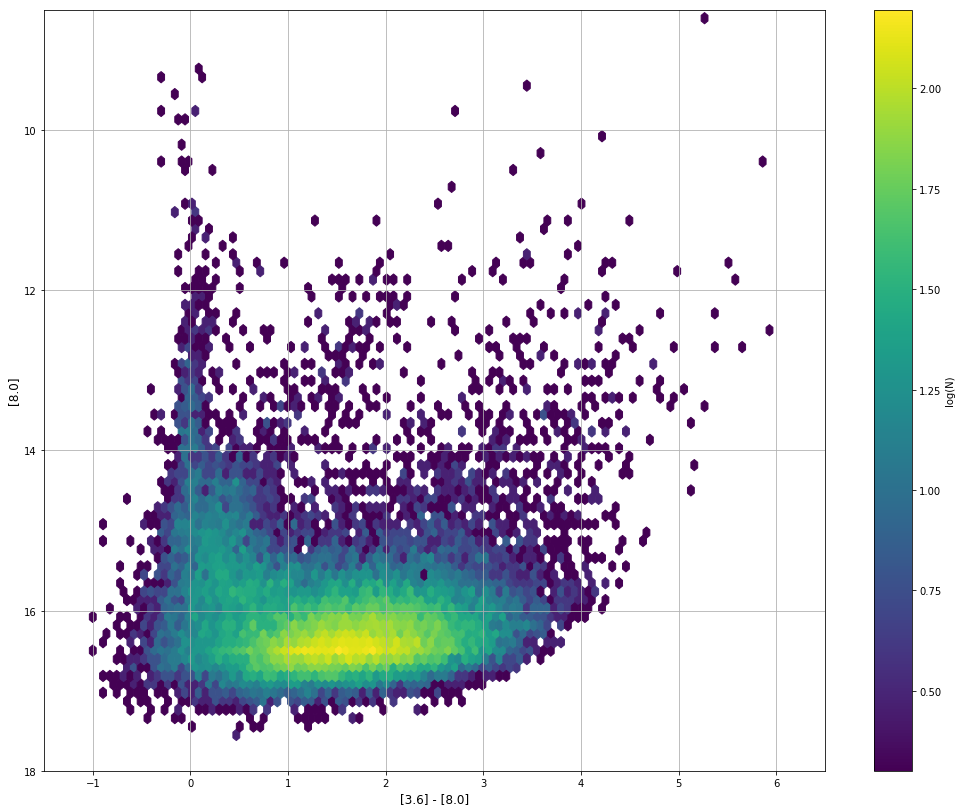

In [57]:
# 50

plt.figure(figsize=(14,14))
plt.plot(phot_data.threesixMINUSeightzero, phot_data.k80mag, '.')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)

plt.grid(True)
plt.show()
plt.close()

fig, ax1 = plt.subplots(1, 1, figsize=(17.5, 14))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 8.5)
im1 = ax1.hexbin(threesixMINUSeightzeroDATA.threesixMINUSeightzero, threesixMINUSeightzeroDATA.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 8.5))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')

plt.grid(True)
plt.show()
plt.close()